# Principle Component Analysis (PCA)

In [116]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

plt.rcParams.update({
	"text.usetex": True,
	"font.family": "Serif"
})

## Load Iris Dataset

In [117]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [118]:
# loading dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [119]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Standardize the Data

Since PCA seeks to maximize variance along its principal components, it works best when the scales of every feature are standardized. Although, all features in the Iris dataset were measured in centimeters, let us continue with the transformation of the data onto unit scale (mean=0 and variance=1), which is a requirement for the optimal performance of many machine learning algorithms.

In [120]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values

In [121]:
y = df.loc[:,['target']].values

In [122]:
x = StandardScaler().fit_transform(x)

In [123]:
pd.DataFrame(data = x, columns = features).head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


# Scree Plots

The scree plot was introduced by Raymond B. Cattell in 1996, and provides an easily interpretible way to determine the number of components to retain in principal component analysis.

In [124]:
scaled_data = pd.DataFrame(data = x, columns = features)

pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

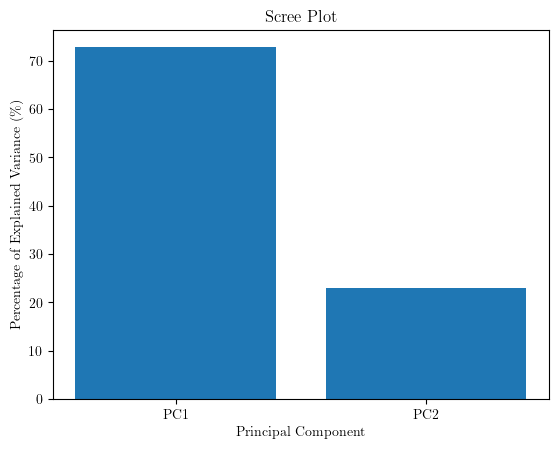

In [144]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance (\%)')
plt.xlabel('Principal Component')
plt.title(r'Scree Plot')
plt.show()

Based on the scree plot, we can tell that the first two dimensions capture most of the variation. Precisely, it will capture...

In [126]:
print(f"{100*(pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1]):.2f}% of the variation.")

95.80% of the variation.


## PCA Projection to 2D

In [127]:
pca = PCA(n_components=2)

In [128]:
principalComponents = pca.fit_transform(x)

In [129]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [130]:
principalDf.head(5)

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [131]:
df[['target']].head()

,target
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [132]:
final_df = pd.concat([principalDf, df[['target']]], axis = 1)
final_df.head(5)

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


## Visualize 2D Projection

Use a PCA projection to 2d to visualize the entire data set. You should plot different classes using different colors or shapes. Do the classes seem well-separated from each other? 

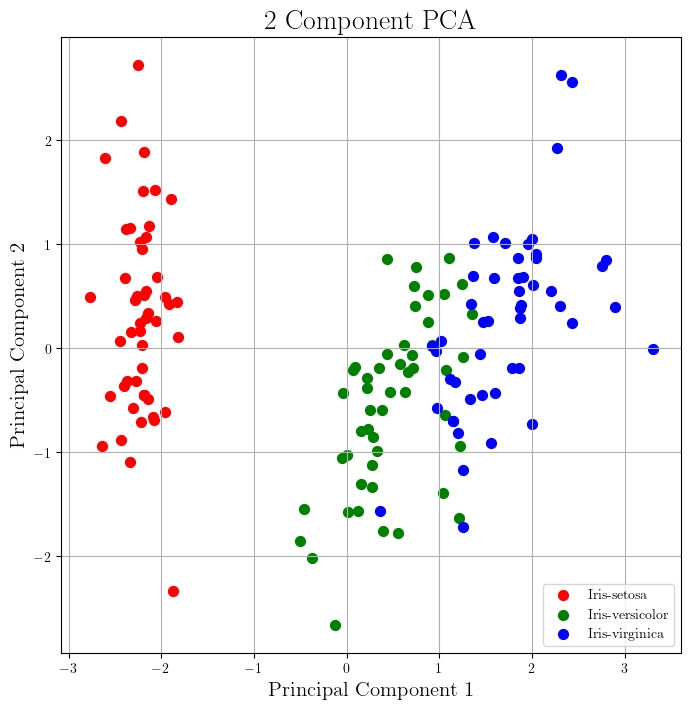

In [133]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
	indicesToKeep = final_df['target'] == target
	ax.scatter(final_df.loc[indicesToKeep, 'principal component 1'], final_df.loc[indicesToKeep, 'principal component 2'], c=color, s=50)
ax.legend(targets)
ax.grid()

The three classes appear to be well separated. iris-virginica and iris-versicolor could be better separated, but still good.

## Component Breakdown

It can be useful to examine the components of our original data columns that make up the new PCA axes.

In [134]:
for index, axis in enumerate(pca.components_):
	print(f"PCA axis {index}:")
	for i in range(4):
		print(f"\t{df.columns[i]}: {axis[i]:.2f}")

PCA axis 0:
	sepal length: 0.52
	sepal width: -0.26
	petal length: 0.58
	petal width: 0.57
PCA axis 1:
	sepal length: 0.37
	sepal width: 0.93
	petal length: 0.02
	petal width: 0.07


# PCA with Numpy

Let us begin with our original dataframe.

In [135]:
df_without_target = df.drop(columns=['target'])
df_without_target.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


The next step is to standardize the features.

In [136]:
# Convert DataFrame to NumPy array
data = df_without_target.to_numpy()

# Subtract the mean of each feature
mean = np.mean(data, axis=0)
std = np.std(data, axis=0)
data_centered = (data - mean)/std

Next, compute the covariance matrix of the standardized features.

In [137]:
cov_matrix = np.cov(data_centered, rowvar=False)

Diagonalizing the covariance matrix gives us the new "principal components", or PCA axes. I.e. the PCA axes are the directions that are not rotated and only scaled by multiplication with the covariance matrix.

In [138]:
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

The top $k$ principal components are selected by sorting the lists of eigenvalues and eigenvectors according to eigenvalue size. A larger eigenvalue means that that axis has the larger variance and thus captures more of the data's variability.

In [139]:
# Step 4: Sort Eigenvalues and Eigenvectors
# Sort the eigenvalues in descending order and sort the eigenvectors accordingly
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Step 5: Project the Data
# Select the top k eigenvectors (principal components)
k = 2  # Number of principal components to keep
principal_components = sorted_eigenvectors[:, :k]

The last step is to project the original data on to the new basis set (PCA axes). This is readily achieved by taking the dot product of the original data with the new axis. 

In [140]:
# Project the data onto the principal components
data_pca = np.dot(data_centered, principal_components)

# Convert the result back to a DataFrame for easier handling
df_pca = pd.DataFrame(data_pca, columns=[f'PC{i+1}' for i in range(k)])

# Display the resulting DataFrame
df_pca.head()

,PC1,PC2
0,2.264542,0.505704
1,2.086426,-0.655405
2,2.367950,-0.318477
3,2.304197,-0.575368
4,2.388777,0.674767


## Scree Plot from PCA with Numpy 

The explained variance is determined by the (normalized) eigenvalues.

In [141]:
normalized_eigenvalues = sorted_eigenvalues/sum(sorted_eigenvalues)

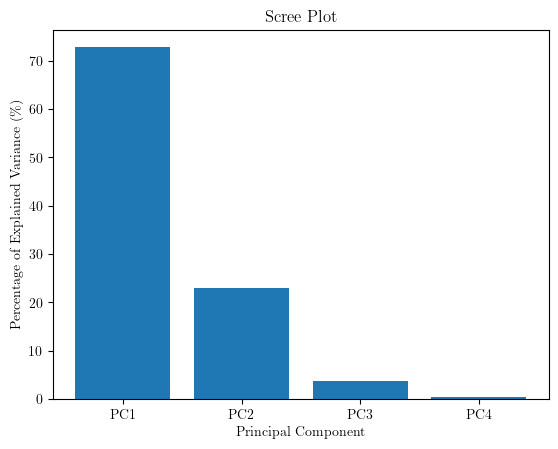

In [145]:
per_var = np.round(normalized_eigenvalues * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance (\%)')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()